In [70]:
import matplotlib.pyplot as plt
import pandas as pd
import scienceplots
import seaborn as sns

plt.style.use(["science", "no-latex"])
my_style = {
    "text.usetex": False,
    "figure.constrained_layout.use": True,
    "figure.autolayout": False,
    "savefig.bbox": "tight",
    "savefig.pad_inches": 0.015,
    "font.size": 14,
    "axes.labelsize": 14,
    "legend.fontsize": 12,
    "xtick.labelsize": 9,
    "ytick.labelsize": 9,
    "axes.titlesize": 14,
}
plt.rcParams.update(my_style)

In [2]:
import glob
import os

import pandas as pd

In [99]:
def read_csv_files(file_pattern):
    all_data = []
    for file in glob.glob(file_pattern):
        dataset_name = os.path.basename(os.path.dirname(file)).replace("_dataset", "")
        df = pd.read_csv(file, header=[0, 1], index_col=0)
        df = df.reset_index()
        df.columns = ["Classifier"] + [f"{col[1]}_{col[0]}" for col in df.columns[1:]]
        df["Dataset"] = dataset_name
        if "_train.csv" in str(file):
            df["Split"] = "train"
        if "_test.csv" in str(file):
            df["Split"] = "test"
        all_data.append(df)
    return pd.concat(all_data, ignore_index=True)


def process_classification_data(df):
    df = df[~df["Classifier"].isin(["Transformation", "Classifier"])]
    df = df.dropna().reset_index(drop=True)
    return df


def create_formatted_dataframe(df):
    metrics = ["Accuracy", "Matthews", "F1-Score"]

    # Create MultiIndex columns
    column_tuples = [(metric, method) for metric in metrics for method in ["PCA", "POLCA"]]
    columns = pd.MultiIndex.from_tuples(column_tuples)

    # Create the new DataFrame
    formatted_df = pd.DataFrame(columns=columns)

    for metric in metrics:
        formatted_df[(metric, "PCA")] = df[f"PCA_{metric}"]
        formatted_df[(metric, "POLCA")] = df[f"POLCA_{metric}"]

    formatted_df.index = pd.MultiIndex.from_frame(df[["Dataset","Classifier","Split"]])
    formatted_df = formatted_df.sort_index()

    return formatted_df

In [100]:
# Main execution
print("Starting main execution")
raw_classification_metrics = read_csv_files("experiments/*/classification_metrics_*.csv")
classification_metrics = process_classification_data(raw_classification_metrics)

Starting main execution


In [107]:
formatted_df = create_formatted_dataframe(classification_metrics)

In [108]:
print("\nFormatted DataFrame:")
formatted_df.head(20)


Formatted DataFrame:


Accuracy       Matthews       F1-Score  \
                                            PCA POLCA      PCA POLCA      PCA   
Dataset     Classifier           Split                                          
bloodmnist  Gaussian Naive Bayes test      0.71  0.76     0.66  0.72     0.71   
                                 train     0.71  0.77     0.66  0.73     0.71   
            Linear SVM           test      0.76  0.81     0.72  0.78     0.76   
                                 train     0.78  0.81     0.74  0.78     0.77   
            Logistic Regression  test      0.73  0.79     0.69  0.75     0.73   
                                 train     0.75  0.80     0.71  0.76     0.75   
            Perceptron           test      0.51  0.67     0.49  0.64     0.47   
                                 train     0.68  0.68     0.64  0.64     0.65   
            Ridge Classifier     test      0.64  0.70     0.58  0.65     0.62   
                                 train     0.63  0.71     0.57  0.66     0.61   
breastmnist Gaussian Naive Bayes test      0.83  0.83     0.55  0.56     0.82   
                                 train     0.80  0.80     0.46  0.44     0.79   
            Linear SVM           test      0.81  0.73     0.50  0.00     0.78   
                                 train     0.75  0.75     0.23  0.23     0.67   
            Logistic Regression  test      0.78  0.78     0.38  0.37     0.72   
                                 train     0.78  0.77     0.34  0.33     0.73   
            Perceptron           test      0.79  0.82     0.47  0.51     0.79   
                                 train     0.52  0.73     0.28  0.00     0.53   
            Ridge Classifier     test      0.81  0.83     0.48  0.53     0.79   
                                 train     0.78  0.79     0.37  0.40     0.75   

                                              
                                       POLCA  
Dataset     Classifier           Split        
bloodmnist  Gaussian Naive Bayes test   0.76  
                                 train  0.77  
            Linear SVM           test   0.81  
                                 train  0.81  
            Logistic Regression  test   0.79  
                                 train  0.80  
            Perceptron           test   0.66  
                                 train  0.66  
            Ridge Classifier     test   0.68  
                                 train  0.68  
breastmnist Gaussian Naive Bayes test   0.83  
                                 train  0.78  
            Linear SVM           test   0.62  
                                 train  0.67  
            Logistic Regression  test   0.73  
                                 train  0.73  
            Perceptron           test   0.81  
                                 train  0.62  
            Ridge Classifier     test   0.80  
                                 train  0.76

In [109]:
# Generate LaTeX table
latex_table = formatted_df.to_latex(
    multirow=True,
    multicolumn=True,
    caption="Classification Metrics Comparison",
    label="tab:classifier_metric_comparison",
    position="htbp",
    float_format="%.2f",
    column_format="llrrrrrr",
)
print(latex_table)
# with open("experiments/classifier_metric_comparison.tex", "w") as f:
#     f.write(latex_table)

\begin{table}[htbp]
\caption{Classification Metrics Comparison}
\label{tab:classifier_metric_comparison}
\begin{tabular}{llrrrrrr}
\toprule
 &  &  & \multicolumn{2}{r}{Accuracy} & \multicolumn{2}{r}{Matthews} & \multicolumn{2}{r}{F1-Score} \\
 &  &  & PCA & POLCA & PCA & POLCA & PCA & POLCA \\
Dataset & Classifier & Split &  &  &  &  &  &  \\
\midrule
\multirow[t]{10}{*}{bloodmnist} & \multirow[t]{2}{*}{Gaussian Naive Bayes} & test & 0.71 & 0.76 & 0.66 & 0.72 & 0.71 & 0.76 \\
 &  & train & 0.71 & 0.77 & 0.66 & 0.73 & 0.71 & 0.77 \\
\cline{2-9}
 & \multirow[t]{2}{*}{Linear SVM} & test & 0.76 & 0.81 & 0.72 & 0.78 & 0.76 & 0.81 \\
 &  & train & 0.78 & 0.81 & 0.74 & 0.78 & 0.77 & 0.81 \\
\cline{2-9}
 & \multirow[t]{2}{*}{Logistic Regression} & test & 0.73 & 0.79 & 0.69 & 0.75 & 0.73 & 0.79 \\
 &  & train & 0.75 & 0.80 & 0.71 & 0.76 & 0.75 & 0.80 \\
\cline{2-9}
 & \multirow[t]{2}{*}{Perceptron} & test & 0.51 & 0.67 & 0.49 & 0.64 & 0.47 & 0.66 \\
 &  & train & 0.68 & 0.68 & 0.64 & 0.64 & 0.6

In [113]:
# Reshape the DataFrame
df_long = (
    formatted_df.stack(level=[0, 1], future_stack=True)
    .reset_index()
    .rename(columns={"level_3": "Metric", "level_4": "Method", 0: "Value"})
)
df_long

,Dataset,Classifier,Split,Metric,Method,Value
0,bloodmnist,Gaussian Naive Bayes,test,Accuracy,PCA,0.71
1,bloodmnist,Gaussian Naive Bayes,test,Accuracy,POLCA,0.76
2,bloodmnist,Gaussian Naive Bayes,test,Matthews,PCA,0.66
3,bloodmnist,Gaussian Naive Bayes,test,Matthews,POLCA,0.72
4,bloodmnist,Gaussian Naive Bayes,test,F1-Score,PCA,0.71
...,...,...,...,...,...,...
835,retinamnist,Ridge Classifier,train,Accuracy,POLCA,0.51
836,retinamnist,Ridge Classifier,train,Matthews,PCA,0.20
837,retinamnist,Ridge Classifier,train,Matthews,POLCA,0.27
838,retinamnist,Ridge Classifier,train,F1-Score,PCA,0.40


In [114]:
df_long =pd.DataFrame(df_long[df_long["Metric"]=="Accuracy"].copy())
df_long

,Dataset,Classifier,Split,Metric,Method,Value
0,bloodmnist,Gaussian Naive Bayes,test,Accuracy,PCA,0.71
1,bloodmnist,Gaussian Naive Bayes,test,Accuracy,POLCA,0.76
6,bloodmnist,Gaussian Naive Bayes,train,Accuracy,PCA,0.71
7,bloodmnist,Gaussian Naive Bayes,train,Accuracy,POLCA,0.77
12,bloodmnist,Linear SVM,test,Accuracy,PCA,0.76
...,...,...,...,...,...,...
823,retinamnist,Perceptron,train,Accuracy,POLCA,0.43
828,retinamnist,Ridge Classifier,test,Accuracy,PCA,0.51
829,retinamnist,Ridge Classifier,test,Accuracy,POLCA,0.56
834,retinamnist,Ridge Classifier,train,Accuracy,PCA,0.48


In [115]:
classifier_means = df_long.groupby("Classifier")["Value"].mean().sort_values(ascending=True)
classifier_ranks = {classifier: rank for rank, classifier in enumerate(classifier_means.index)}
df_sorted = df_long.sort_values(
    by=["Classifier", "Method"], key=lambda x: x.map(classifier_ranks) if x.name == "Classifier" else x
)
df_sorted = df_sorted.reset_index(drop=True)
df_sorted

,Dataset,Classifier,Split,Metric,Method,Value
0,bloodmnist,Perceptron,test,Accuracy,PCA,0.51
1,bloodmnist,Perceptron,train,Accuracy,PCA,0.68
2,breastmnist,Perceptron,test,Accuracy,PCA,0.79
3,breastmnist,Perceptron,train,Accuracy,PCA,0.52
4,chestmnist,Perceptron,test,Accuracy,PCA,0.50
...,...,...,...,...,...,...
275,pathmnist,Linear SVM,train,Accuracy,POLCA,0.75
276,pneumoniamnist,Linear SVM,test,Accuracy,POLCA,0.89
277,pneumoniamnist,Linear SVM,train,Accuracy,POLCA,0.95
278,retinamnist,Linear SVM,test,Accuracy,POLCA,0.54


In [116]:
df = pd.DataFrame(df_sorted.copy())
df

,Dataset,Classifier,Split,Metric,Method,Value
0,bloodmnist,Perceptron,test,Accuracy,PCA,0.51
1,bloodmnist,Perceptron,train,Accuracy,PCA,0.68
2,breastmnist,Perceptron,test,Accuracy,PCA,0.79
3,breastmnist,Perceptron,train,Accuracy,PCA,0.52
4,chestmnist,Perceptron,test,Accuracy,PCA,0.50
...,...,...,...,...,...,...
275,pathmnist,Linear SVM,train,Accuracy,POLCA,0.75
276,pneumoniamnist,Linear SVM,test,Accuracy,POLCA,0.89
277,pneumoniamnist,Linear SVM,train,Accuracy,POLCA,0.95
278,retinamnist,Linear SVM,test,Accuracy,POLCA,0.54


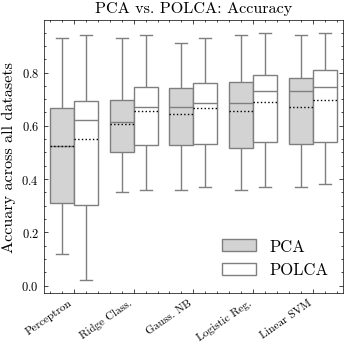

In [117]:
fig, ax = plt.subplots(figsize=(3.5, 3.5))
sns.boxplot(
    data=df,
    x="Classifier",
    y="Value",
    hue="Method",
    fill=True,
    palette={"PCA": "lightgray", "POLCA": "white"},   
    gap=0.0,
    width=0.8,    
    showmeans=True,
    meanprops={"ls": ":", "c": "k"},
    meanline=True,
    showfliers=False,
    fliersize=0.5,
)
plt.xlabel("")
ax.set_ylabel(f"Accuary across all datasets", fontsize="small")

ax.set_xticks(range(len(df.Classifier.unique())))
tlabels = [t.get_text() for t in ax.get_xticklabels()]
tlabels[tlabels.index("Gaussian Naive Bayes")] = "Gauss. NB"
tlabels[tlabels.index("Logistic Regression")] = "Logistic Reg."
tlabels[tlabels.index("Ridge Classifier")] = "Ridge Class."
ax.set_xticklabels(tlabels, rotation=35, ha="right", fontsize="xx-small")
ax.set_title(f"PCA vs. POLCA: Accuracy", fontsize="small")
# ax.set_ylim(0.1, 1.0)

# Add in points to show each observation
plt.legend()
# Tweak the visual presentation
# sns.despine(trim=False, left=True, right=True, top=True, bottom=True)
plt.savefig("experiments/classifier_metric_comparison_boxplot.pdf", dpi=300, bbox_inches="tight")